In [ ]:
!jupyter nbconvert --to html /content/Rodrigo_Mesquita_PB_TP1.ipynb

[NbConvertApp] Converting notebook /content/Rodrigo_Mesquita_PB_TP1.ipynb to html
[NbConvertApp] Writing 815561 bytes to /content/Rodrigo_Mesquita_PB_TP1.html


# **Rodrigo_Mesquita_PB_TP1**
## **Projeto de Bloco: Inteligência Artificial e Machine Learning [24E1_5]**

# Carregamento de Dados
Identifique as características (features) e o alvo (target) nos conjuntos de dados, compreendendo sua estrutura e importância.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.impute   import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Titanic-Dataset.csv')

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df.shape[0]

891

In [ ]:

nulls = df.isnull().sum()
nulls

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_x = df[['Pclass','Sex','Age','SibSp','Parch','Fare']]
df_y = df[['Survived']]

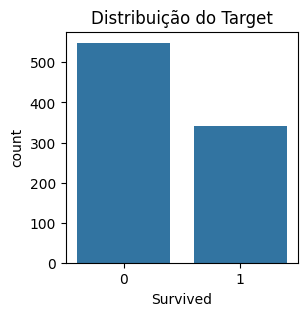

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(data=df_y, x='Survived')
plt.title('Distribuição do Target')
plt.show()

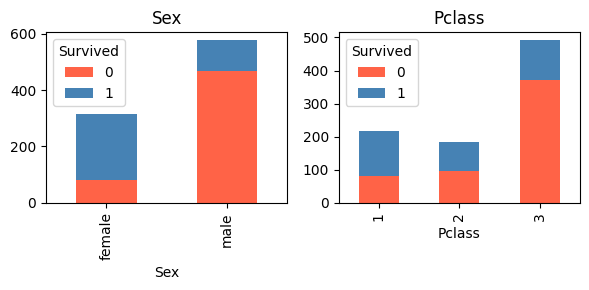

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))  # 1 linha, 2 colunas

# Gráfico 1: Sex
df_plot1 = df.groupby(['Sex', 'Survived']).size().unstack()
df_plot1.plot(kind='bar', stacked=True, color=['tomato', 'steelblue'], ax=axs[0])
axs[0].set_title('Sex')

# Gráfico 2: Pclass
df_plot2 = df.groupby(['Pclass', 'Survived']).size().unstack()
df_plot2.plot(kind='bar', stacked=True, color=['tomato', 'steelblue'], ax=axs[1])
axs[1].set_title('Pclass')

# Ajustando o layout e exibindo os gráficos
plt.tight_layout()
plt.show()

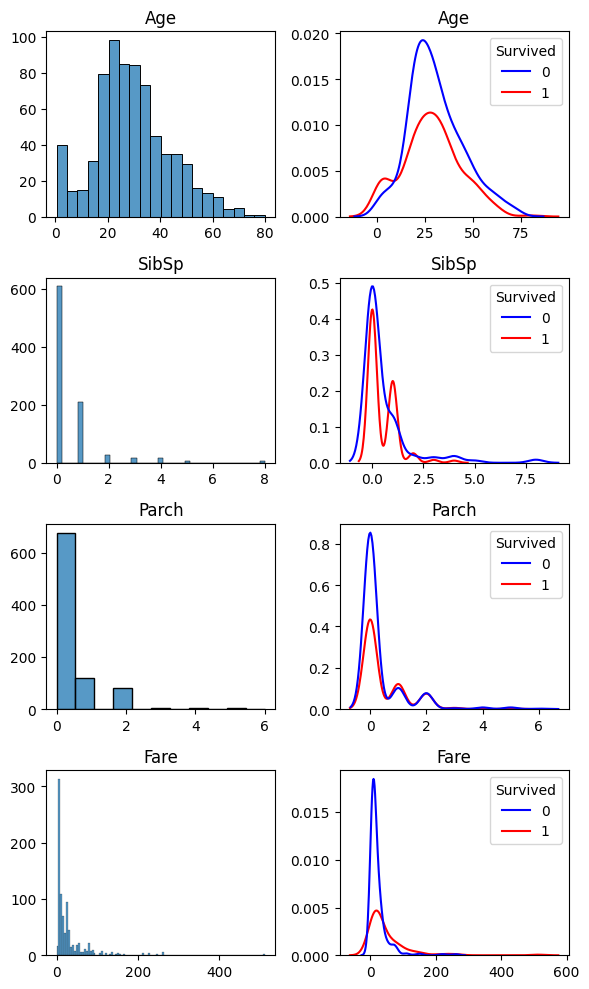

In [ ]:
df_plot = df[['Survived','Age','SibSp','Parch','Fare']]

fig, ax = plt.subplots(4,2, figsize=(6, 10))
for i, col in enumerate(df_plot.columns[1:7]):
    sns.histplot(data = df_plot, x=col, ax=ax[i,0])
    ax[i,0].set_title(col)
    ax[i,0].set_xlabel('')
    ax[i,0].set_ylabel('')

    sns.kdeplot(data=df_plot, x=col,hue='Survived', palette=['blue','red'],ax=ax[i,1])
    ax[i,1].set_title(col)
    ax[i,1].set_xlabel('')
    ax[i,1].set_ylabel('')
plt.tight_layout()
plt.show()

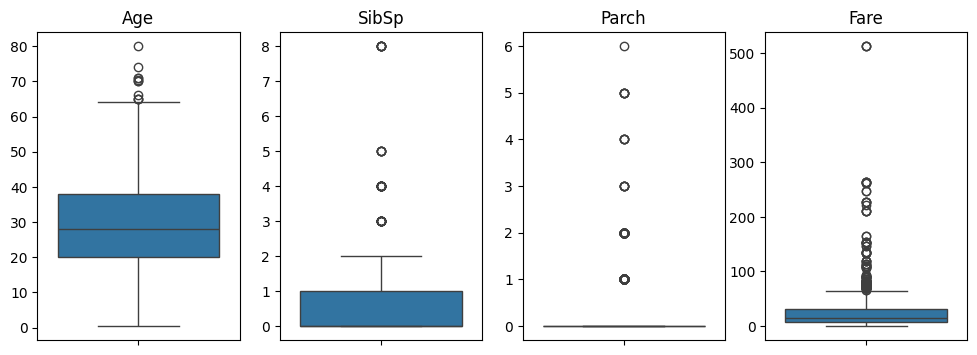

In [ ]:
df_plot = df[['Age','SibSp','Parch','Fare']]

fig, ax = plt.subplots(1, 4, figsize=(12, 4))
for i, col in enumerate(df_plot.columns):
    sns.boxplot(data=df_plot, y=col, ax=ax[i])
    ax[i].set_ylabel('')
    ax[i].set_title(col)

plt.show()

#Divisão de Dados
Separe os dados em conjuntos de treino e validação, essenciais para o desenvolvimento e avaliação de modelos de ML. Você irá dividir 80% dos dados para treino e o restante para validação.

In [ ]:
df_x = df_x.copy()
df_x['Sex'] = df_x['Sex'].map({'male': '0', 'female': '1'})
df_x.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.2, random_state = 20)

# Transformação de Dados
Utilize transformadores do Scikit-Learn para ajustar e padronizar as variáveis dos dados.

In [ ]:
def max_fare(data):
    data = data.apply(lambda x: 100 if x > 100 else x)
    return data

func_max_fare = FunctionTransformer(max_fare)
x_train['Fare'] = func_max_fare.fit_transform(x_train['Fare'])

func_imputer_mean = SimpleImputer(strategy='mean')
x_train['Age'] = func_imputer_mean.fit_transform(x_train['Age'].values.reshape(-1, 1))
x_test['Age'] = func_imputer_mean.transform(x_test['Age'].values.reshape(-1, 1))

In [ ]:
scaler = PowerTransformer()

x_train_norm = pd.DataFrame(scaler.fit_transform(x_train))
x_test_norm = pd.DataFrame(scaler.fit_transform(x_test))

x_train_norm

,0,1,2,3,4,5
0,0.876893,-0.756138,0.702005,-0.666593,-0.561948,0.318371
1,0.876893,-0.756138,0.038897,-0.666593,-0.561948,-0.836015
2,0.876893,1.322511,-0.897090,1.403815,-0.561948,-0.006839
3,0.876893,-0.756138,-0.111294,-0.666593,-0.561948,-0.836015
4,0.876893,-0.756138,0.337661,1.403815,1.721642,-0.228888
...,...,...,...,...,...,...
707,-1.444013,1.322511,0.189548,-0.666593,-0.561948,1.587674
708,0.876893,-0.756138,0.038897,-0.666593,-0.561948,-0.836015
709,0.876893,-0.756138,-0.341454,-0.666593,-0.561948,-3.200636
710,0.876893,1.322511,-0.576081,-0.666593,-0.561948,-0.618220


# Modelagem de K-Nearest Neighbors (KNN)
Implemente e ajuste o algoritmo KNN, compreendendo suas nuances e aplicabilidade.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(x_train_norm, y_train.values.ravel())
y_pred = knn.predict(x_test_norm)

#Avaliação de Modelos
Avalie a qualidade do modelo desenvolvido usando acurácia


In [ ]:
print('Acurácia:', metrics.accuracy_score(y_test,y_pred))

Acurácia: 0.7877094972067039


# Análise de Parâmetros
Explore diferentes valores para o parâmetro K do KNN e analise seu impacto nos resultados obtidos (através da acurácia do modelo para os dados de validação).

In [ ]:
#Euclidean
print('Acurácia | Euclidean | K=3:', metrics.accuracy_score(y_test,y_pred))

knn5 = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn5.fit(x_train_norm, y_train.values.ravel())
y_pred = knn5.predict(x_test_norm)
print('Acurácia | Euclidean | K=5:', metrics.accuracy_score(y_test,y_pred))

knn11 = KNeighborsClassifier(n_neighbors = 11, metric = 'euclidean')
knn11.fit(x_train_norm, y_train.values.ravel())
y_pred = knn11.predict(x_test_norm)
print('Acurácia | Euclidean | K=11:', metrics.accuracy_score(y_test,y_pred))

#Manhattan
knn11_manhattan = KNeighborsClassifier(n_neighbors = 11, metric = 'manhattan')
knn11_manhattan.fit(x_train_norm, y_train.values.ravel())
y_pred = knn11_manhattan.predict(x_test_norm)
print('Acurácia | Manhattan | K=11:', metrics.accuracy_score(y_test,y_pred))

#Minkowski
knn11_hamming = KNeighborsClassifier(n_neighbors = 11, metric = 'hamming')
knn11_hamming.fit(x_train_norm, y_train.values.ravel())
y_pred = knn11_hamming.predict(x_test_norm)
print('Acurácia | Hamming | K=11:', metrics.accuracy_score(y_test,y_pred))

Acurácia | Euclidean | K=3: 0.6256983240223464
Acurácia | Euclidean | K=5: 0.7597765363128491
Acurácia | Euclidean | K=11: 0.8100558659217877
Acurácia | Manhattan | K=11: 0.7988826815642458
Acurácia | Hamming | K=11: 0.6256983240223464
